**TensorFlow Lab: Structured Data (Tabular) Classification in Google Colab**


This lab demonstrates how to build and train a neural network for tabular data classification using TensorFlow/Keras. We'll use the Heart Disease UCI dataset to predict cardiovascular disease.

**Step 1: Setup Colab Environment**

In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
import matplotlib.pyplot as plt

**Step 2: Load and Explore Data**

In [2]:
# Load dataset from URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]
df = pd.read_csv(url, names=column_names, na_values='?')

# Clean data
df = df.dropna()
df['target'] = (df['target'] > 0).astype(int)  # Convert to binary classification

# Preview
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (297, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


**Step 3: Preprocess Data**

In [3]:
# Split features and target
X = df.drop('target', axis=1)
y = df['target']

# Identify feature types
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Create preprocessing pipeline
preprocessor = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(), categorical_features)
)

# Split and preprocess data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (237, 28)
Test data shape: (60, 28)


**Step 4: Build the Model**

In [4]:
def create_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy', keras.metrics.AUC(name='auc')]
    )

    return model

model = create_model(X_train.shape[1])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,969 (15.50 KB)

 Trainable params: 3,969 (15.50 KB)

 Non-trainable params: 0 (0.00 B)

**Step 5: Train the Model**

In [5]:
# Add early stopping
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.4770 - auc: 0.5029 - loss: 0.7113 - val_accuracy: 0.6833 - val_auc: 0.7118 - val_loss: 0.6628
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6383 - auc: 0.6864 - loss: 0.6472 - val_accuracy: 0.7500 - val_auc: 0.8148 - val_loss: 0.5939
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7595 - auc: 0.8378 - loss: 0.5714 - val_accuracy: 0.7333 - val_auc: 0.8524 - val_loss: 0.5441
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7367 - auc: 0.8190 - loss: 0.5608 - val_accuracy: 0.8167 - val_auc: 0.8733 - val_loss: 0.5077
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7972 - auc: 0.8765 - loss: 0.4959 - val_accuracy: 0.8500 - val_auc: 0.8941 - val_loss: 0.4688
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8301 - auc: 0.8878 - loss: 0.4656 - val_accuracy: 0.8500 - val_auc: 0.9080 - val_loss: 0.4323
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step -

**Step 6: Evaluate Performance**

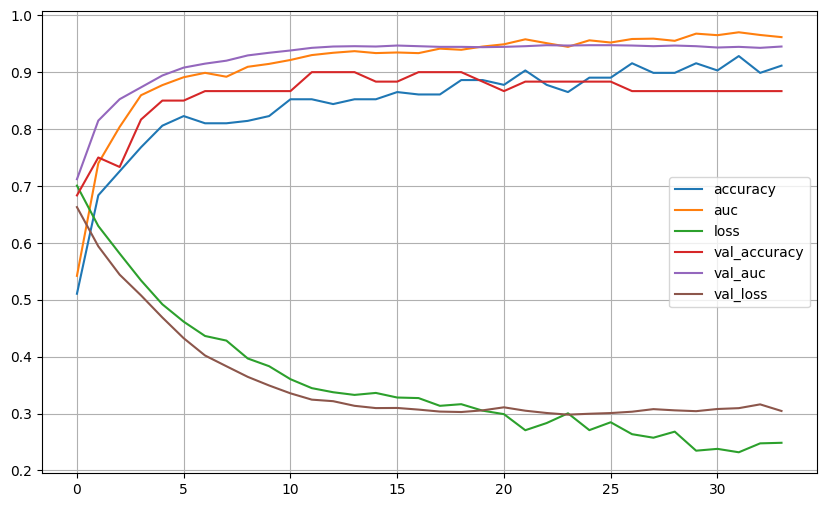


Test Accuracy: 0.8833
Test AUC: 0.9468
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

Confusion Matrix:
[[32  4]
 [ 3 21]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        36
           1       0.84      0.88      0.86        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



In [11]:
# Plot training history
pd.DataFrame(history.history).plot(figsize=(10, 6))
plt.grid(True)
plt.show()

# Evaluate on test set
test_loss, test_acc, test_auc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

**Step 7: Save and Export Model**

In [12]:
# Save model
model.save('heart_disease_model.h5')

# Load model demonstration
loaded_model = keras.models.load_model('heart_disease_model.h5')
print("\nModel loaded successfully!")


Model loaded successfully!
